<a href="https://colab.research.google.com/github/StrangeCroissant/ODConv_keeps/blob/main/SVM_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  
from skimage.feature import hog
from skimage.color import rgb2grey
import cv2


from tensorflow.keras.datasets import cifar10

#cvm 
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, f1_score

# **Data Exploration**

First from tensorflow datasets we want to inport the cifar10 dataset. This is a collection of images meant for image recognition model training

We split the dataset into train/test

We check sizes and reshape y_train to 1D-array

We are working with 50000 image samples of 32x32 pixels x 3 chanels(RGB) dimensions

In [ ]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0].shape

(32, 32, 3)

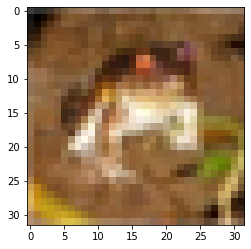

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train.shape

(50000, 1)

y_train contains the labels for the samples, for the y_train data we need a 1D array. So we reshape y_train 

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

We want to create a listo of all the labels. We know from the cifar10 documentation that there are 10 classes in total [0,9]. 

In [ ]:
classes=['airplane','automobile','cat',
        'bird','deer','dog',
        'frog','horse','ship',
        'truck']
classes[6]

'frog'

The function below plots a sample with it's label

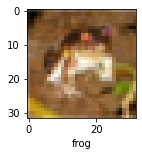

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train,y_train,0)

# Data Normalization and Processing for SVM input

When we train our model, we can not pass an **m X m X 3** *italicized text* dimentional image. We will grayscale our samples to reduce the RGB channel size to 1 and then reshape the images to 2D ***m X m*** 

In [ ]:
X_train_gray = np.zeros(X_train.shape[:-1])
X_test_gray = np.zeros(X_test.shape[:-1])
for i in range(X_train.shape[0]):
    X_train_gray[i] = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY)

X_test_gray = np.zeros(X_test.shape[:-1])
for j in range(X_test.shape[0]):
    X_test_gray[j] = cv2.cvtColor(X_test[j],cv2.COLOR_BGR2GRAY)

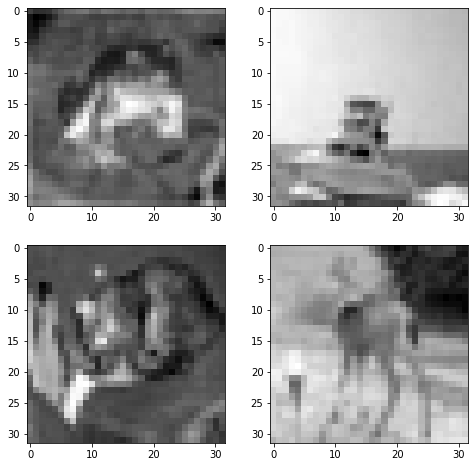

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0][0].imshow(X_train_gray[0],cmap='gray')
axs[0][1].imshow(X_train_gray[100],cmap='gray')
axs[1][0].imshow(X_test_gray[0],cmap='gray')
axs[1][1].imshow(X_test_gray[100],cmap='gray')

In [ ]:
print(X_train_gray.shape)
print(X_test_gray.shape)

(50000, 32, 32)
(10000, 32, 32)


We have succesfully converted the 50000 32x32x3 of the training dataset to 32x32 2D images. The same for the 10000 test images.

The pixel values flactuate from 0 to 255, we want to normalize the values to [0,1]

In [ ]:
X_train = X_train/255
X_test = X_test/255

# Feature Engineering



Histogram of orienteted gradients (HOG) and flattening to produce a 1D array to input in our SVM model

In [ ]:
#def feature_cre(smpl):
#    flat = smpl.flatten()
#    hog_feat = hog(smpl,block_norm='L2-Hys',pixels_per_cell=(8,8))
#    flat_feat = np.hstack(flat)
#    return flat_feat


In [ ]:
#features = feature_cre(X_train_gray)

# **Creating SVM model**

We will attempt to create an SVM clasifier from scratch.

---

The hyperplane function is : 
\begin{equation} f(\vec{w},\vec{x},b) = (\vec{w}. \vec{x} -b) \end{equation}

The mutliclass classification problem is not supported by a simple SVM model. We can approach this with either one-to-one(OTO) or one-to-rest(OTR).



1.   In OTR the classifier can use **m** SVMs. Each SVM would predict membership in one of the **m** classes. 
2.   In OTO, the classifier can use 
\begin{equation} 
{m(m-1)/2} 
\end{equation} SVMs


In this notebook we will try both approaches. 